<a href="https://colab.research.google.com/github/prashanta4coursera/Panda-EDA-Project/blob/master/winedataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![wine](https://static.vinepair.com/wp-content/uploads/2018/01/blackwine-internal.jpg)  

# Content : 
#### 1. [Understanding the wine data columns](#section1) <a href = '#section1'></a>
#### 2. [Perform basic data check](#section2) <a href = '#section2'></a>
#### 3. [Perform relation analysis by graphical approach](#section3) <a href = '#section3'></a>
#### 4. [Cleaning the data](#section4) <a href = '#section4'></a>  
#### 5. [Checking the relations after cleaning](#section5) <a href = '#section5'></a>
#### 6. [Conclusion](#section6) <a href = '#section6'></a>

<a id ='section1'></a>
## **Understanding the wine data columns**
The dataset is related to red and white variants of the Portuguese **"Vinho Verde"** wine

1. **fixed acidity**  
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)


2. **volatile acidity**  
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste


3. **citric acid**  
found in small quantities, citric acid can add 'freshness' and flavor to wines


4. **residual sugar**  
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet


5. **chlorides**
the amount of salt in the wine


6. **free sulfur dioxide**  
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine  


7. **total sulfur dioxide**  
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine


8. **density**  
the density of water is close to that of water depending on the percent alcohol and sugar con-tent


9. **pH**  
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale


10. **sulphates**  
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicro-bial and antioxidant


11. **alcohol**  
the percent alcohol content of the wine


13. **quality**  
output variable (based on sensory data, score between 0 and 10)

---




























<a id ='section1'></a>
## **Perform basic data check**

Import all libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

download the file from the source.

In [9]:
winequality_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
winequality_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


We will add our own definition of quality of wine based on quality index.

In [0]:
# Good   = [8,9]
# Medium = [5,6,7]
# Poor   = [3,4]

winequality_df['overall'] = winequality_df['quality'].apply(lambda x : 'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )
winequality_df.overall = winequality_df.overall.astype('category')

Let's see the stats of the data.

In [11]:
winequality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Check if there is any NULL values.

In [12]:
winequality_df.isnull().sum()

# No null values as output.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
overall                 0
dtype: int64

check the datatype

In [13]:
winequality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
overall                 6497 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


<a id ='section3'></a>
## **Perform relation analysis by graphical approach**

Let's analyse the relationship with pairplot

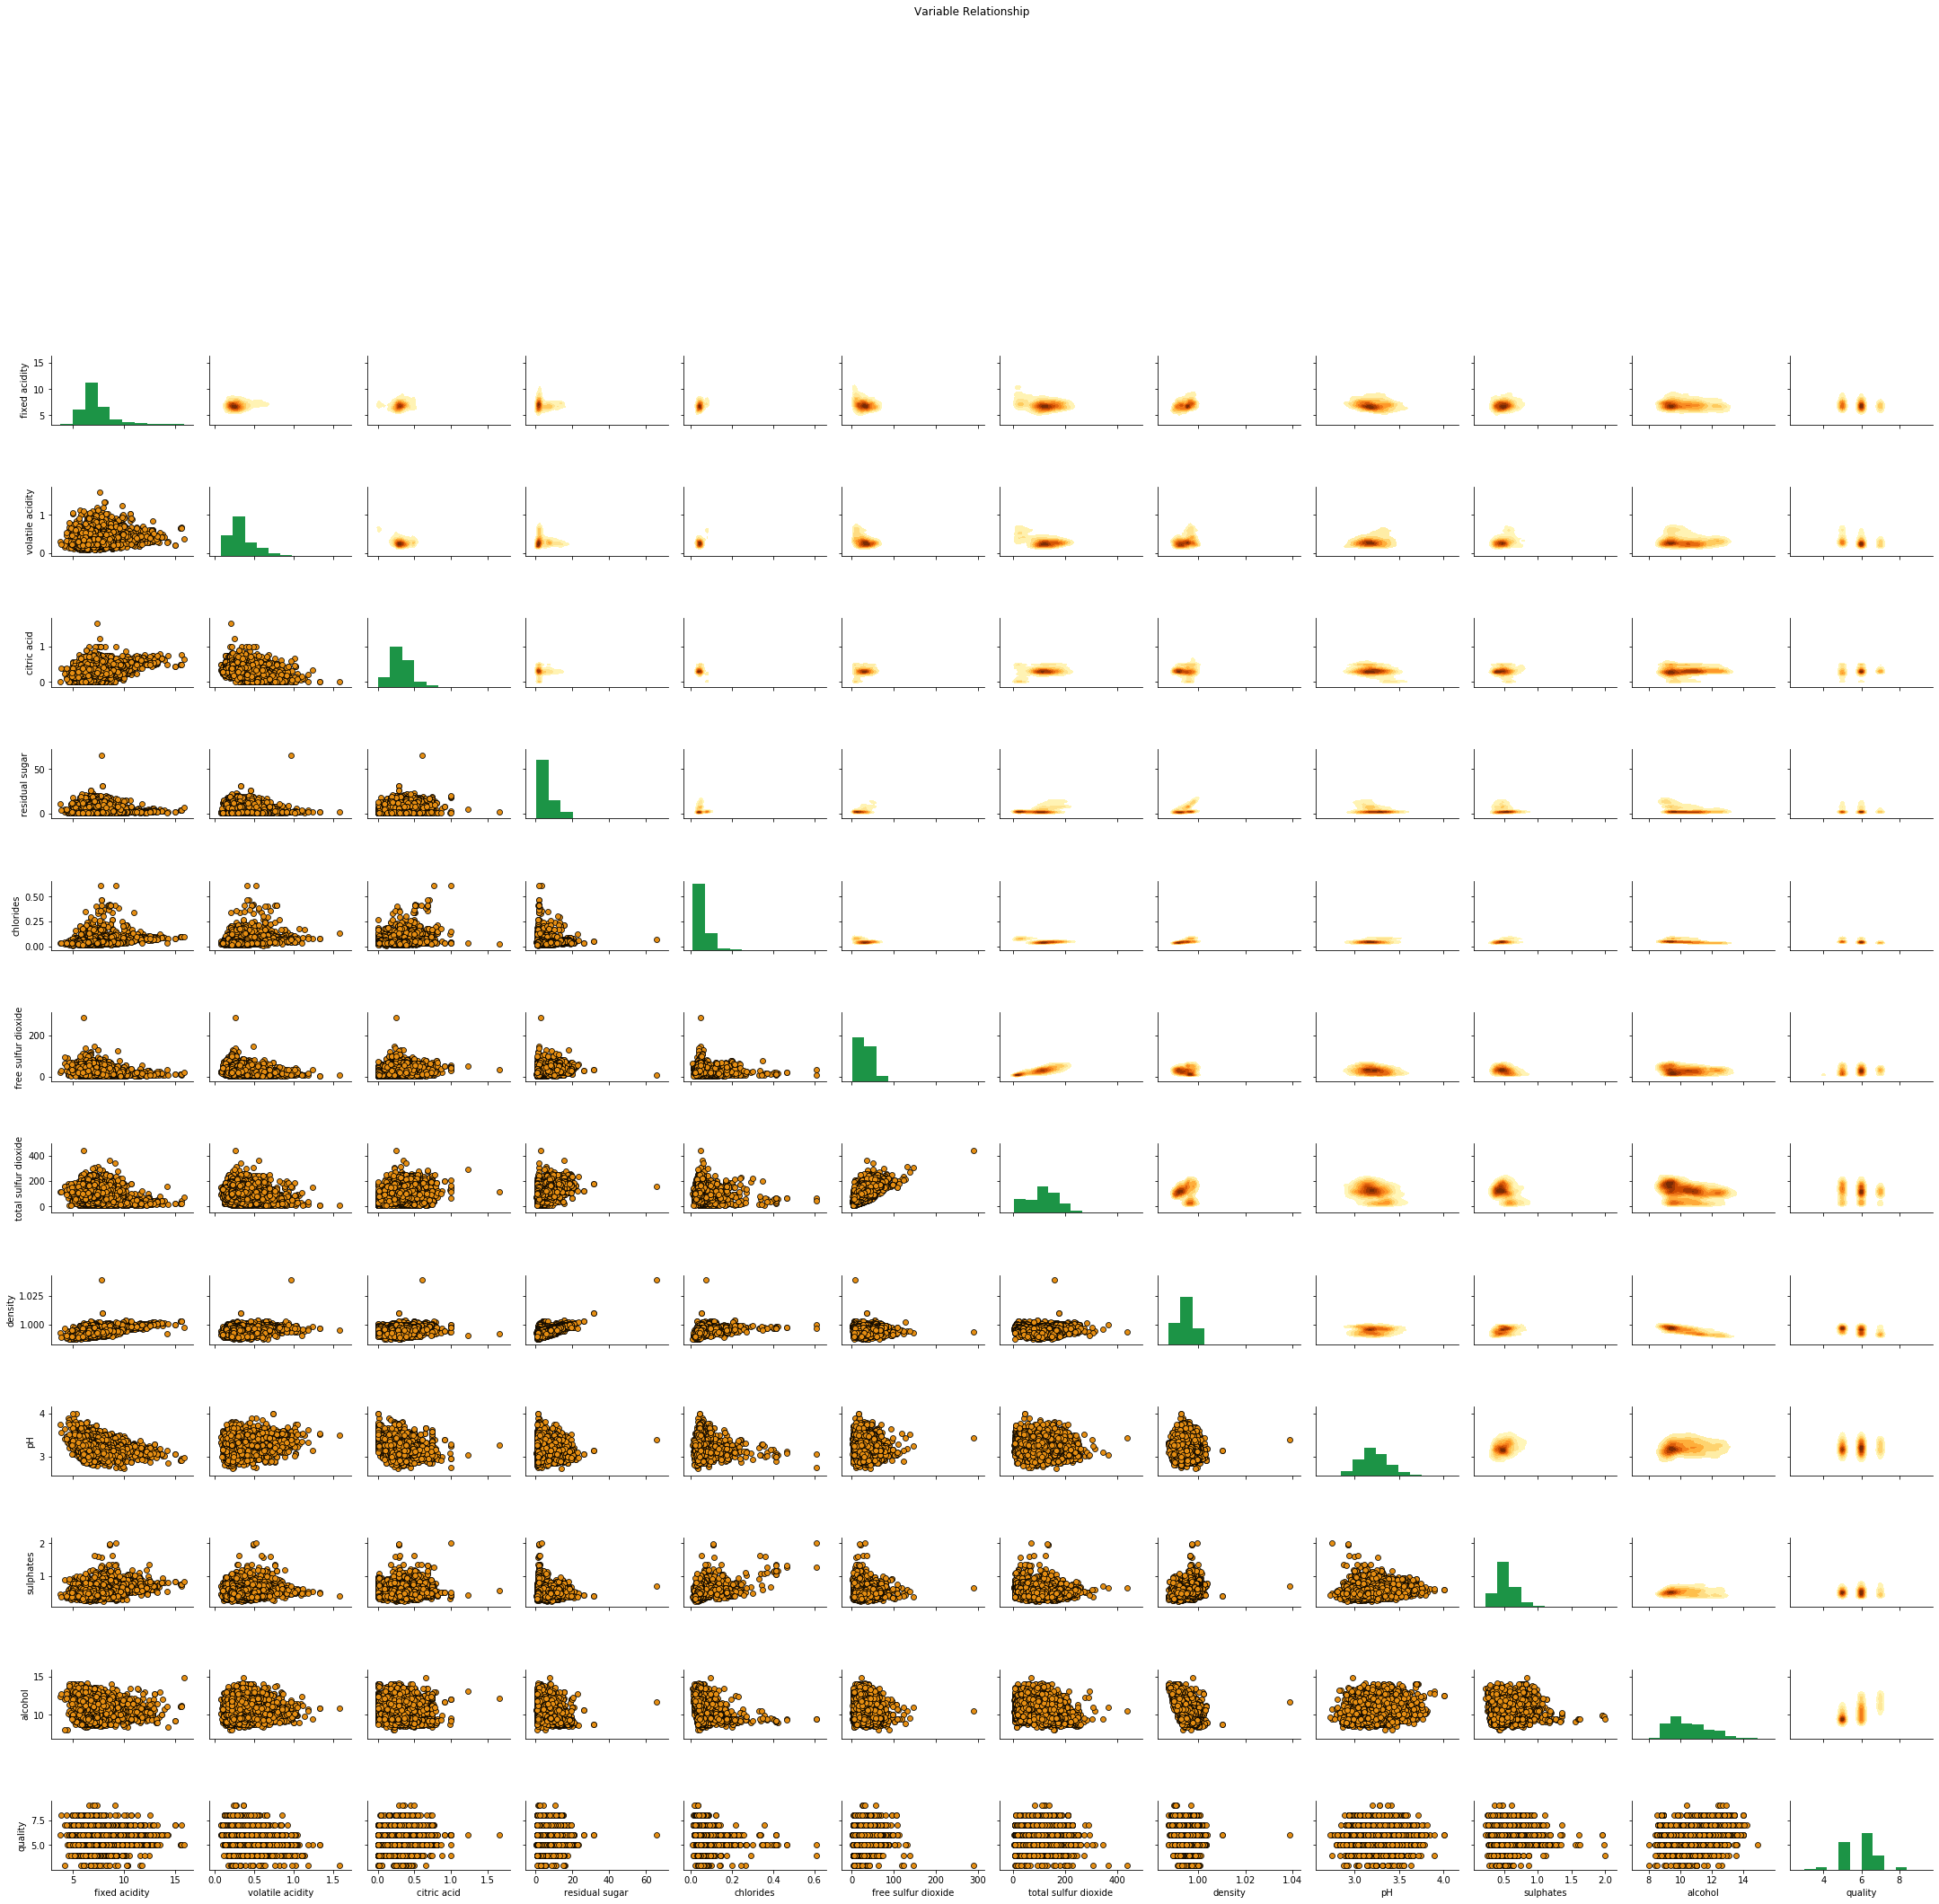

In [14]:
# Make PairPlots with PairGrid function to have more control.

g = sns.PairGrid(winequality_df)
g = g.map_upper(sns.kdeplot, cmap = 'YlOrBr', shade = True, shade_lowest = False)     #KDE
g = g.map_diag(plt.hist, color = '#1c9446')                                           #Histogram
g = g.map_lower(sns.scatterplot, color='#e68e12', edgecolor = 'k')                    #Scatter

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.9)
g.fig.suptitle('Variable Relationship')
plt.show()

Check the strength of the correlation among the variables.

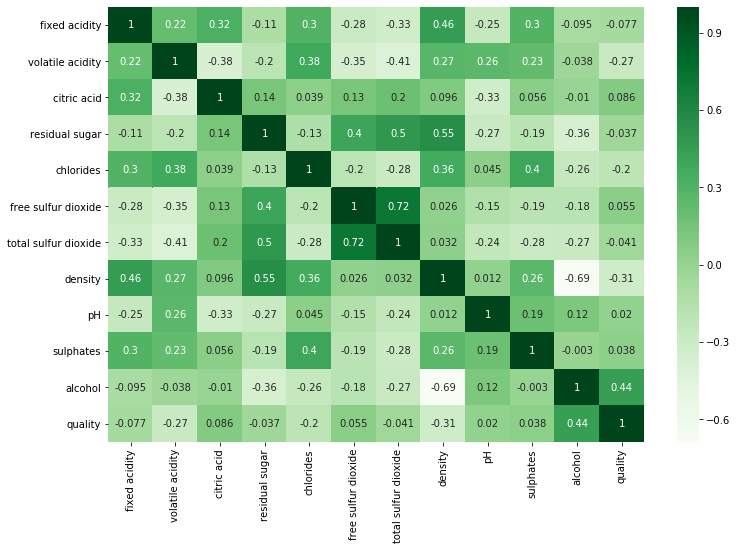

In [15]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(winequality_df.corr(), cmap='Greens', annot=True)
plt.show()

Most important variables

In [16]:
winequality_df.corr()[['quality']].sort_values(by='quality', ascending = False)

# alcohol, density, volatile acidity, chlorides influence the quality of wine in the order. 

,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


plotting the relationship among the important variables

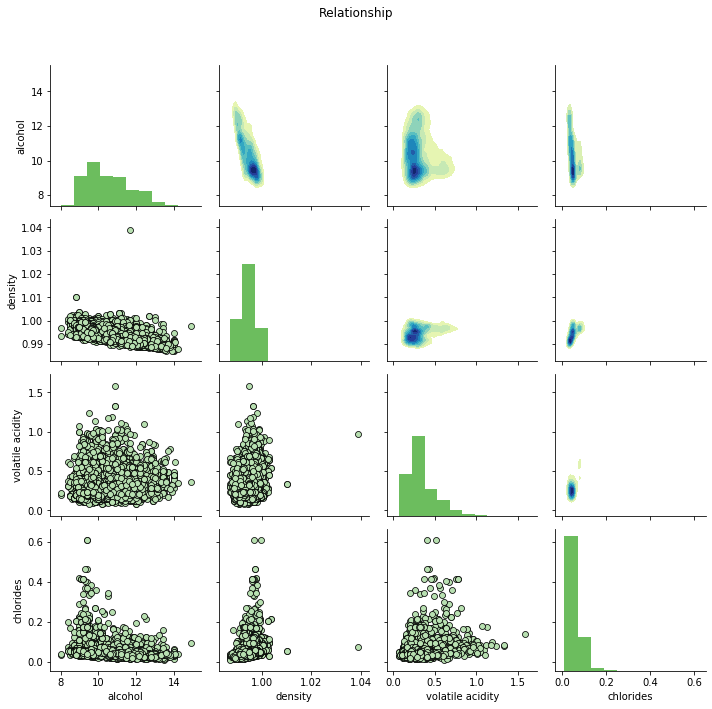

In [17]:
g = sns.PairGrid(winequality_df[['alcohol','density','volatile acidity','chlorides']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

Strong relations : 
1. free sulfur dioxide ~ total sulfur dioxide
2. alcohol ~ density

Moderate relations :
1. total sulfur dioxide ~ residual sugar
2. density ~ residual sugar

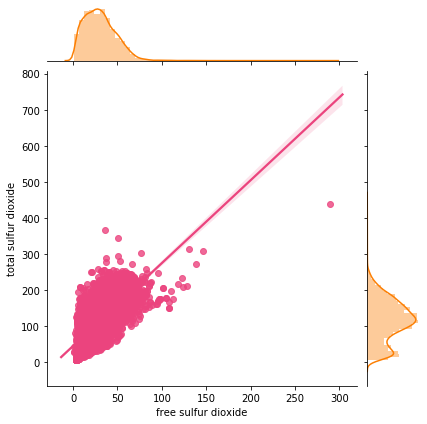

In [18]:
# Plot JointPlot
# free sulfur dioxide ~ total sulfur dioxide

g = sns.JointGrid(x='free sulfur dioxide', y='total sulfur dioxide', data=winequality_df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

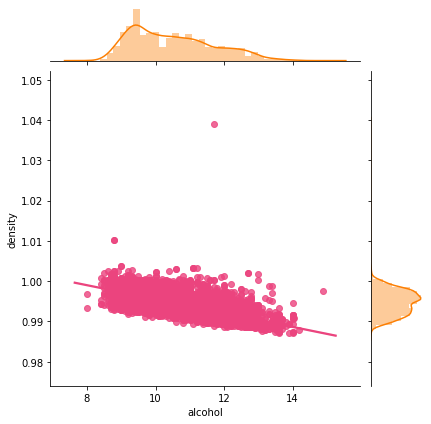

In [19]:
# Plot JointPlot
# alcohol ~  density

g = sns.JointGrid(x='alcohol', y='density', data=winequality_df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

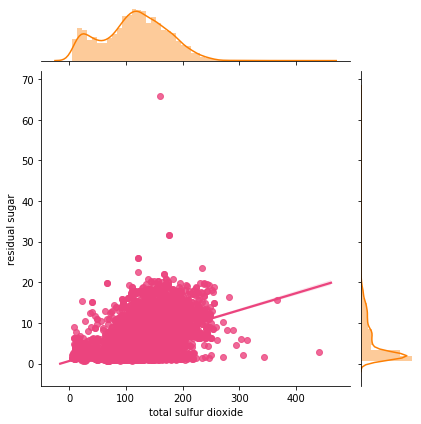

In [20]:
# Plot JointPlot
# total sulfur dioxide ~ residual sugar

g = sns.JointGrid(x='total sulfur dioxide', y='residual sugar', data=winequality_df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

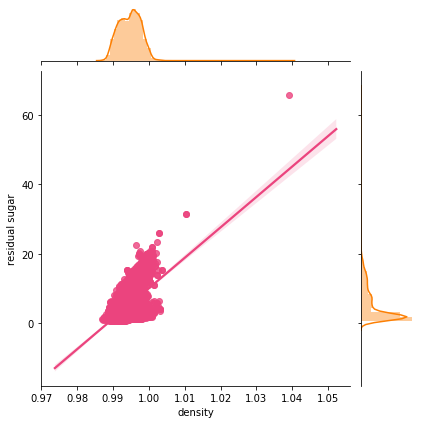

In [21]:
# Plot JointPlot
# density ~ residual sugar

g = sns.JointGrid(x='density', y='residual sugar', data=winequality_df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

reshape the dataframe with pd.melt for preparing a facetgrid.

In [22]:
facet_grid_df = pd.melt(winequality_df, id_vars=['quality','overall'], value_vars=winequality_df.columns[:11], var_name='variable', value_name='value')
facet_grid_df.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
facet_grid_df.reset_index(drop=True, inplace=True)
facet_grid_df.quality = facet_grid_df.quality.astype('str')
facet_grid_df.quality = facet_grid_df.quality.astype('category')
facet_grid_df.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


Distribution of various varibales across the wine quality : FacetGrid

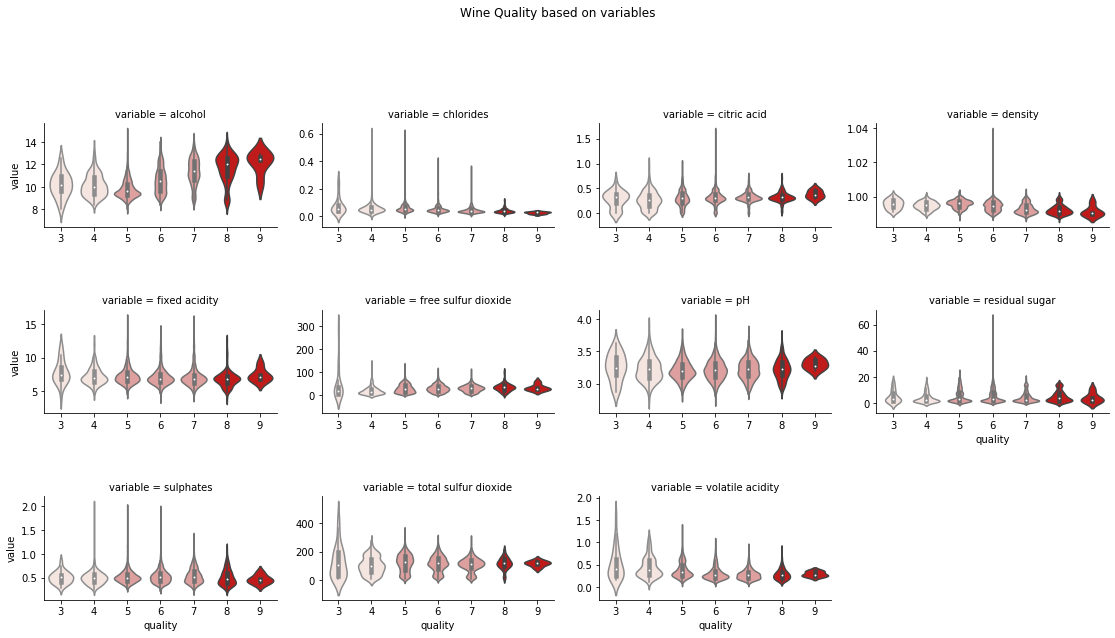

In [23]:
# FacetGrid

g = sns.FacetGrid(facet_grid_df, col='variable', col_wrap=4, hue='overall', palette={'Poor':'#F7E3DE', 'Medium':'#E99494', 'Good':'#DB0000'}, 
                  sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, hue_order=['Poor','Medium','Good'])
g.map(sns.violinplot, 'quality', 'value', order=['3', '4', '5', '6', '7', '8', '9'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Wine Quality based on variables')
legend = ['Poor','Medium','Good']
plt.show()

Column bar sugesting the variation of the quality of wine with vriation of variable quantity.

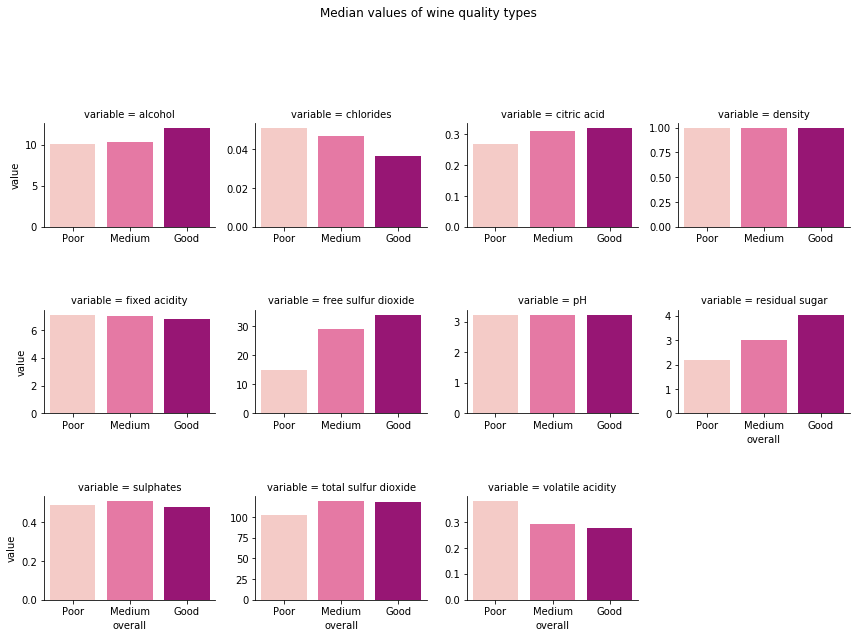

In [24]:
# Plot bar graph for the median values.

d = facet_grid_df.groupby(['variable','overall'], as_index=False)[['value']].median()

g = sns.FacetGrid(d, col='variable', col_wrap=4, sharey=False, sharex=False, height=3, aspect=1, legend_out=True, 
                  hue='overall', hue_order=['Poor','Medium','Good'],palette='RdPu')
g.map(sns.barplot, 'overall', 'value', order=['Poor','Medium','Good'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Median values of wine quality types')
plt.show()

<a id ='section4'></a>
## **Cleaning the data**

We want to get rid of the extreme outliers.  
How we do it ?  
1. Reshape the dataframe
2. Drop rows below 1% and above 99% quantile.

In [25]:
# Reshape the data with melt function so that facetgrid can be applied on the variables.

corrected_melt = pd.melt(winequality_df, id_vars=['quality','overall'], value_vars=winequality_df.columns[:11], var_name='variable', value_name='value')
corrected_melt.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
corrected_melt.reset_index(drop=True, inplace=True)
corrected_melt.quality = facet_grid_df.quality.astype('str')
corrected_melt.quality = facet_grid_df.quality.astype('category')
corrected_melt.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


In [0]:
# Create 1% quantile data
p01 = corrected_melt.groupby(['quality','variable'], as_index=False)[['value']].quantile(.01)
p01.rename(columns={'value':'1%'}, inplace=True)

# Create 99% quantile data
p99 = corrected_melt.groupby(['quality','variable'], as_index=False)[['value']].quantile(.99)
p99.rename(columns={'value':'99%'}, inplace=True)

# Merge both columns
corrected_df = corrected_melt.merge(p01, on=['quality','variable']).merge(p99, on=['quality','variable'])

# A function to create columns for 1% and 99% quantile data
def corrected_value(value,one,ninenine) : 
  if (value >=one) and (value <=ninenine) : 
    return value
  else :  
    return np.NaN

# Apply the function
corrected_df['corrected value'] = corrected_df.apply(lambda x: corrected_value(x['value'], x['1%'], x['99%']), axis=1)
corrected_df.dropna(axis=0, how='any', inplace=True)

In [27]:
# Check the record
corrected_df.shape

(70221, 7)

In [28]:
#Select only the original column, drop the 1% and 99% columns from the frame.
corrected_df = corrected_df[['quality','overall','variable','value']]
corrected_df.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


<a id ='section4'></a>
## **Checking the relations after cleaning**

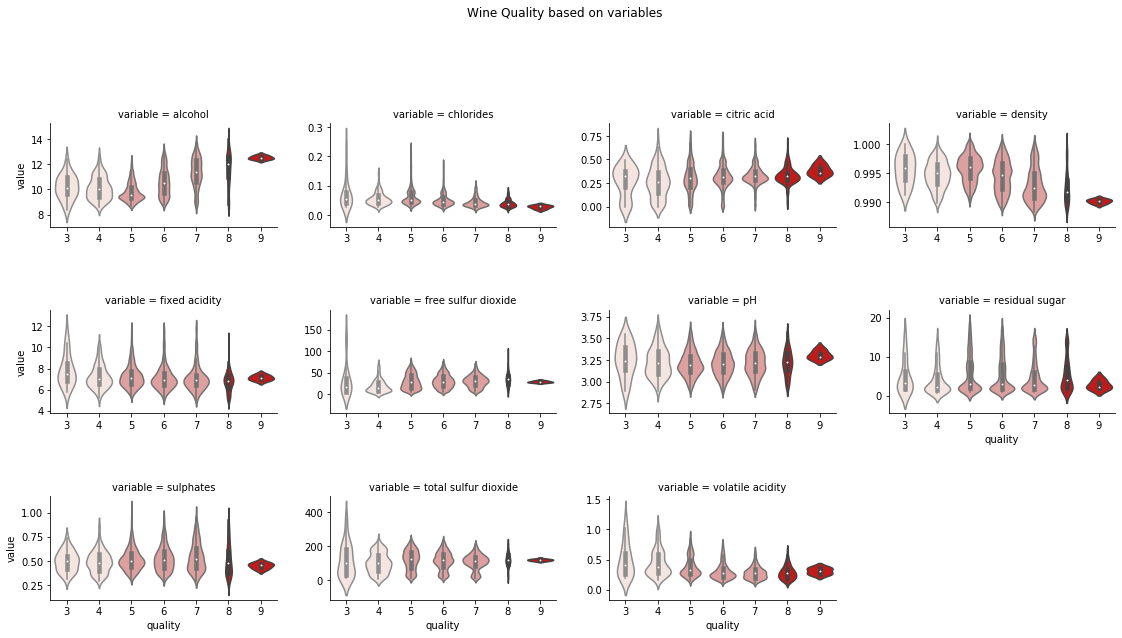

In [29]:
# Again a FacetGrid for the violinplot.

g = sns.FacetGrid(corrected_df, col='variable', col_wrap=4, hue='overall', palette={'Poor':'#F7E3DE', 'Medium':'#E99494', 'Good':'#DB0000'}, 
                  sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, hue_order=['Poor','Medium','Good'])
g.map(sns.violinplot, 'quality', 'value', order=['3', '4', '5', '6', '7', '8', '9'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Wine Quality based on variables')
legend = ['Poor','Medium','Good']
plt.show()

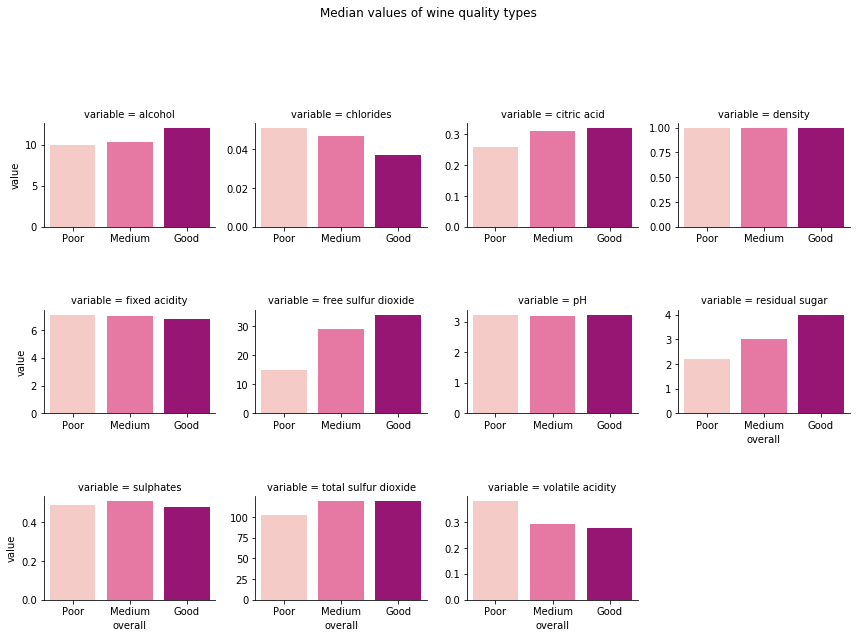

In [30]:
# Plot bar for the median values.

d = corrected_df.groupby(['variable','overall'], as_index=False)[['value']].median()

g = sns.FacetGrid(d, col='variable', col_wrap=4, sharey=False, sharex=False, height=3, aspect=1, legend_out=True, 
                  hue='overall', hue_order=['Poor','Medium','Good'],palette='RdPu')
g.map(sns.barplot, 'overall', 'value', order=['Poor','Medium','Good'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Median values of wine quality types')
plt.show()

<a id ='section4'></a>
## **Conclusion**

1. ##### As alcohol level increase ==> Quality increases
2. ##### As chlorides level decreases ==> Quality increases
3. ##### As citric acid level increases ==> Quality increases
4. ##### As density decreases ==> Quality increases
5. ##### fixed acidity ==> can't say impact on Quality
6. ##### As free sulfur dioxide increases ==> Quality increases
7. ##### pH ==> can't say impact on Quality
8. ##### As residual sugar increases ==> Quality increases
9. ##### sulphates ==> can't say impact on Quality
10. ##### total sulfur dioxide ==> can't say impact on Quality
11. ##### As the volatile acidity decreases ==> Quality increases  

But since, only below four contributes towards winequality :   
alcohol, density, volatile acidity, chlorides

1. ##### Increase in the alcohol qty, increases the quality of the wine.
2. ##### Decrease in the density of the wine, increases the quality of the wine.
3. ##### Decrease in the volatile acidity of the wine, increases the quality of the wine.
4. ##### Decrease in chlorides, increases the quality of the wine.